In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as geopd
import pandas as pd

import requests as req
import seaborn as sns

BASE = "https://apitransporte.buenosaires.gob.ar"
creds = {
    "client_id": "a7d61f007fbf49698f53d45baa549f82",
    "client_secret": "a6916E0D16A94c1D8CdF81D6C4De8713"
}
comunas = geopd.read_file('comunas.geojson')

In [2]:
params = creds.copy()
resp = req.get(f'{BASE}/colectivos/vehiclePositionsSimple', params=params)
data = pd.read_json(resp.content)

In [3]:
# Ignoro la letra del ramal
data['bondi'] = data['route_short_name'].str.slice(0,-1)

# Me quedo con las lineas que pasan por ciudad
bondis_ciudad = ['28', '33', '34', '37', '42', '45', '107', '160', '166']
ciudad = data[data['bondi'].isin(bondis_ciudad)]

# Outliers?
ciudad = ciudad[ciudad.longitude.ge(-60)]
ciudad = ciudad[ciudad.longitude.le(-58.2)]
ciudad

,route_id,latitude,longitude,speed,timestamp,id,direction,agency_name,agency_id,route_short_name,tip_id,trip_headsign,bondi
525,411,-34.64229,-58.415240,5.277777,2022-11-09 16:02:28,5194,0,MICRO OMNIBUS SUR S.A.C.,64,160I,368556-1,a Est. Lanús,160
531,411,-34.62020,-58.409294,3.888888,2022-11-09 16:02:28,5222,0,MICRO OMNIBUS SUR S.A.C.,64,160I,368558-1,a Est. Lanús,160
533,411,-34.69596,-58.400585,0.000000,2022-11-09 16:02:28,5226,0,MICRO OMNIBUS SUR S.A.C.,64,160I,368554-1,a Est. Lanús,160
536,411,-34.61960,-58.409260,3.055555,2022-11-09 16:02:28,5239,0,MICRO OMNIBUS SUR S.A.C.,64,160I,368558-1,a Est. Lanús,160
537,412,-34.67281,-58.431680,9.444444,2022-11-09 16:02:28,5242,1,MICRO OMNIBUS SUR S.A.C.,64,160J,389520-1,a Pza. Miserere,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7967,1378,-34.56260,-58.597885,10.000000,2022-11-09 16:02:00,60708,0,TRANSPORTES ALMIRANTE BROWN S.A.,87,33E,48054-1,None,33
7976,2043,-34.68604,-58.387085,1.666666,2022-11-09 16:02:00,60881,0,D.O.T.A. S.A. DE TRANSPORTE AUTOMOTOR,3,28G,376193-1,None,28
7989,925,-34.52227,-58.759700,4.444444,2022-11-09 16:02:30,61256,1,MICRO OMNIBUS SUR S.A.C.,64,160B,30182-1,,160
7994,923,-34.53499,-58.777725,0.000000,2022-11-09 16:02:28,61359,1,MICRO OMNIBUS SUR S.A.C.,64,160A,29053-1,,160


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

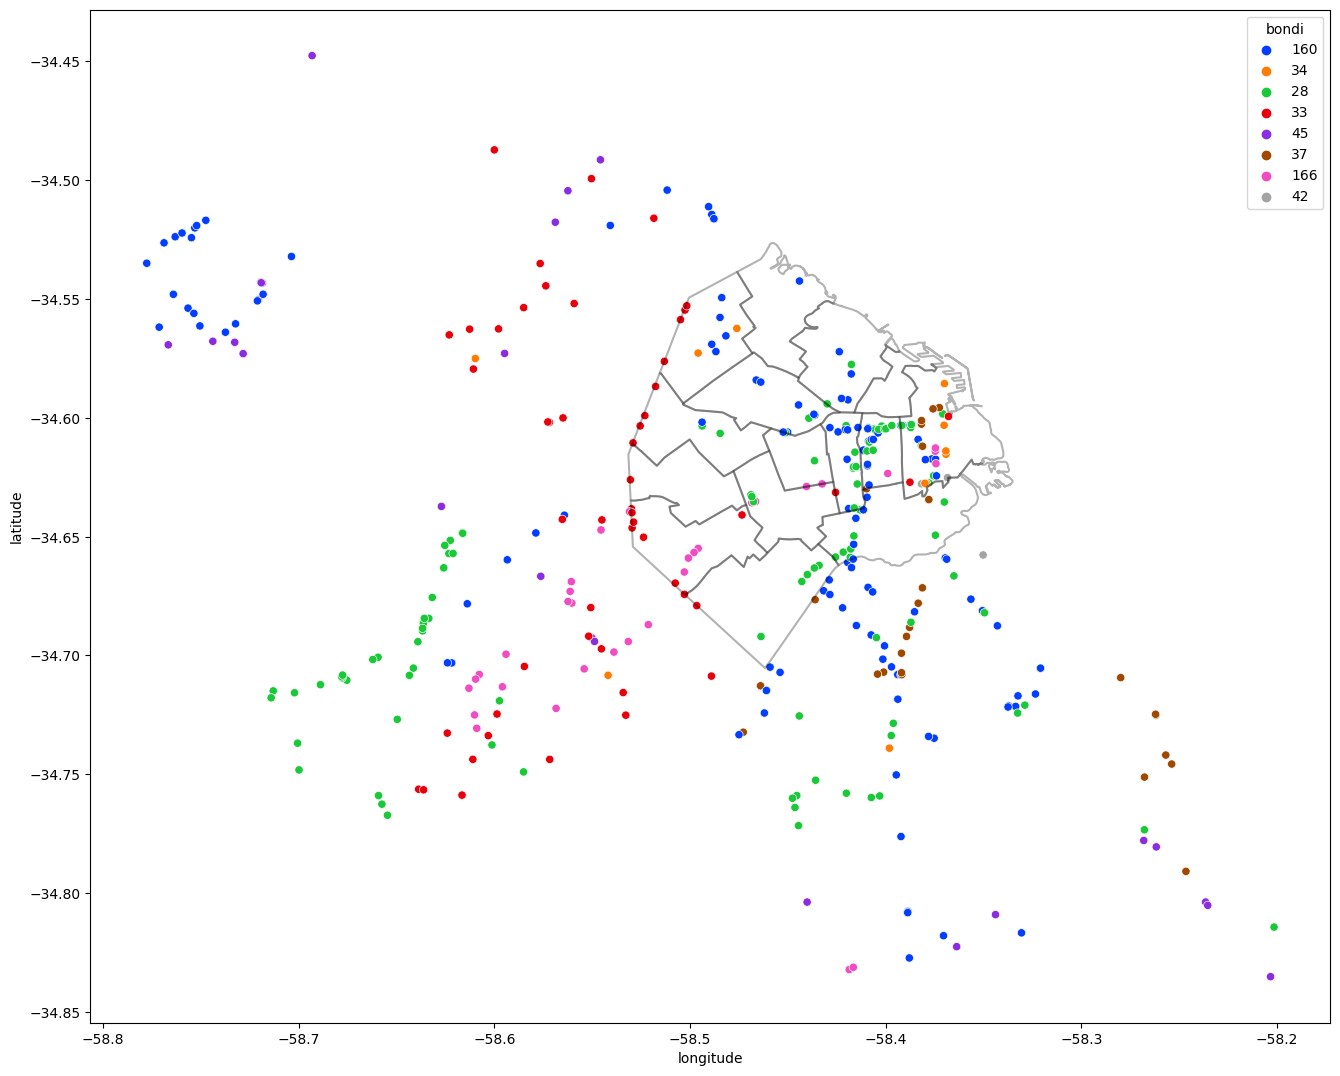

In [4]:
_, ax = plt.subplots(figsize=(16,16))

comunas.boundary.plot(ax=ax, color='black', alpha=0.3)
sns.scatterplot(ax=ax, data=ciudad, x='longitude', y='latitude', hue='bondi', palette='bright')
